In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step: 01

My major is Master of Science in Architectural Studies, so for this final project, I looked for data related to energy in buildings. I looked at a number of data sites that professor gave me, and I was able to find data on the Energy Star Scores of buildings in San Francisco from the site below.

https://catalog.data.gov/dataset/existing-buildings-energy-performance-ordinance-report-08392


In [2]:
df = pd.read_csv("/Users/myeong-won/Desktop/Final Project/3. General Public/Existing_Buildings_Energy_Performance_Ordinance_Report.csv")

In [3]:
df

unique_identifier Parcel Number                  Building Name  \
0         0010/001_2021      0010/001        2801 Leavenworth Street   
1         0010/001_2019      0010/001        2801 Leavenworth Street   
2         0010/001_2017      0010/001        2801 Leavenworth Street   
3         0010/001_2015      0010/001        2801 Leavenworth Street   
4         0010/001_2016      0010/001        2801 Leavenworth Street   
...                 ...           ...                            ...   
23921     9900/278_2014      9900/278  Pier 2 - Agriculture Building   
23922     9900/278_2012      9900/278  Pier 2 - Agriculture Building   
23923     9900/278_2013      9900/278  Pier 2 - Agriculture Building   
23924     9900/278_2015      9900/278  Pier 2 - Agriculture Building   
23925     9900/278_2022      9900/278  Pier 2 - Agriculture Building   

          Building Address  Postal Code  Floor Area Category  \
0      2801 LEAVENWORTH ST        94109      133675   Office   
1      2801 LEAVENWORTH ST        94109      133675   Office   
2      2801 LEAVENWORTH ST        94109      133675   Office   
3      2801 LEAVENWORTH ST        94109      133675   Office   
4      2801 LEAVENWORTH ST        94109      133675   Office   
...                    ...          ...         ...      ...   
23921  101 THE EMBARCADERO        94105       15586   Office   
23922  101 THE EMBARCADERO        94105       15586   Office   
23923  101 THE EMBARCADERO        94105       15586   Office   
23924  101 THE EMBARCADERO        94105       15586   Office   
23925  101 THE EMBARCADERO        94105       15586   Office   

      Property Type - Self Selected  \
0                        Commercial   
1                        Commercial   
2                        Commercial   
3                        Commercial   
4                        Commercial   
...                             ...   
23921    Commercial - Port Facility   
23922    Commercial - Port Facility   
23923    Commercial - Port Facility   
23924    Commercial - Port Facility   
23925    Commercial - Port Facility   

                                                PIM Link  Year Built  ...  \
0      https://sfplanninggis.org/PIM/?tab=Property&se...      1907.0  ...   
1      https://sfplanninggis.org/PIM/?tab=Property&se...      1907.0  ...   
2      https://sfplanninggis.org/PIM/?tab=Property&se...      1907.0  ...   
3      https://sfplanninggis.org/PIM/?tab=Property&se...      1907.0  ...   
4      https://sfplanninggis.org/PIM/?tab=Property&se...      1907.0  ...   
...                                                  ...         ...  ...   
23921  https://sfplanninggis.org/PIM/?tab=Property&se...         0.0  ...   
23922  https://sfplanninggis.org/PIM/?tab=Property&se...         0.0  ...   
23923  https://sfplanninggis.org/PIM/?tab=Property&se...         0.0  ...   
23924  https://sfplanninggis.org/PIM/?tab=Property&se...         0.0  ...   
23925  https://sfplanninggis.org/PIM/?tab=Property&se...         0.0  ...   

      Site Energy Use (kBtu) Benchmark Status  Reason for Exemption  \
0                  6210013.0  2021 - Complied                   NaN   
1                  7434309.8  2019 - Complied                   NaN   
2                        NaN  2017 - Complied                   NaN   
3                        NaN  2015 - Complied                   NaN   
4                        NaN  2016 - Complied                   NaN   
...                      ...              ...                   ...   
23921                    NaN  2014 - Complied                   NaN   
23922                    NaN  2012 - Complied                   NaN   
23923                    NaN  2013 - Complied                   NaN   
23924                    NaN  2015 - Complied                   NaN   
23925              1339702.5  2022 - Complied                   NaN   

                                     point   longitude   latitude  \
0      POINT (-122.419470839 37.807277976) -122.419471  

In [4]:
df.columns

Index(['unique_identifier', 'Parcel Number', 'Building Name',
       'Building Address', 'Postal Code', 'Floor Area', 'Category',
       'Property Type - Self Selected', 'PIM Link', 'Year Built',
       'Energy Audit Due Date', 'Energy Audit Status', 'Benchmark Year',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft2)', 'Source EUI (kBtu/ft2)',
       'Percent Better than National Median Site EUI',
       'Weather Normalized Site EUI (kBtu/ft2)',
       'Weather Normalized Source EUI (kBtu/ft2)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kGCO2e/ft2)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'Site Energy Use (kBtu)',
       'Benchmark Status', 'Reason for Exemption', 'point', 'longitude',
       'latitude', 'analysis_neighborhood', 'supervisor_district',
       'data_as_of', 'data_loaded_at'],
      dtype='object')

# Step: 02


The data included a lot of information such as the building's name and address, postal code, property type, year built, and Energy Star Score for each year.

In [5]:
selected_columns = ['unique_identifier', 'Parcel Number', 'ENERGY STAR Score',
                    'Postal Code', 'Year Built','Benchmark Year',
                    'Reason for Exemption', 'point', 'longitude', 'latitude']
                    

new_df = df[selected_columns]

# Step: 03


For the General Public Project, I aimed to use postal codes to look at year-to-year trends in Energy STAR Scores in San Francisco. The primary goal was to see if the Energy Star of buildings in each postal code neighborhood has changed positively or negatively over time, and I wanted to sum and average the Energy Star scores for each of these postal codes to get a yearly trend of Energy Star scores for all buildings in San Francisco. To do this, I kept the columns we wanted to use and cleared the other data.


In [6]:
new_df

unique_identifier Parcel Number  ENERGY STAR Score  Postal Code  \
0         0010/001_2021      0010/001               86.0        94109   
1         0010/001_2019      0010/001               73.0        94109   
2         0010/001_2017      0010/001               76.0        94109   
3         0010/001_2015      0010/001               72.0        94109   
4         0010/001_2016      0010/001               75.0        94109   
...                 ...           ...                ...          ...   
23921     9900/278_2014      9900/278               20.0        94105   
23922     9900/278_2012      9900/278                NaN        94105   
23923     9900/278_2013      9900/278               25.0        94105   
23924     9900/278_2015      9900/278               16.0        94105   
23925     9900/278_2022      9900/278               66.0        94105   

       Year Built  Benchmark Year Reason for Exemption  \
0          1907.0            2021                  NaN   
1          1907.0            2019                  NaN   
2          1907.0            2017                  NaN   
3          1907.0            2015                  NaN   
4          1907.0            2016                  NaN   
...           ...             ...                  ...   
23921         0.0            2014                  NaN   
23922         0.0            2012                  NaN   
23923         0.0            2013                  NaN   
23924         0.0            2015                  NaN   
23925         0.0            2022                  NaN   

                                     point   longitude   latitude  
0      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
1      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
2      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
3      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
4      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
...                                    ...         ...        ...  
23921  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23922  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23923  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23924  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23925  POINT (-122.392163262 37.794117043) -122.392163  37.794117  

[23926 rows x 10 columns]

In [7]:
df2 = new_df.query("`ENERGY STAR Score` > 0").dropna(subset=['ENERGY STAR Score'])


# Step: 04


To average the Energy Star Score by Postal Code and Benchmark Year, rows with a zero Energy Star Score or no information were removed.

In [8]:
df2

unique_identifier Parcel Number  ENERGY STAR Score  Postal Code  \
0         0010/001_2021      0010/001               86.0        94109   
1         0010/001_2019      0010/001               73.0        94109   
2         0010/001_2017      0010/001               76.0        94109   
3         0010/001_2015      0010/001               72.0        94109   
4         0010/001_2016      0010/001               75.0        94109   
...                 ...           ...                ...          ...   
23919     9900/278_2018      9900/278               46.0        94105   
23921     9900/278_2014      9900/278               20.0        94105   
23923     9900/278_2013      9900/278               25.0        94105   
23924     9900/278_2015      9900/278               16.0        94105   
23925     9900/278_2022      9900/278               66.0        94105   

       Year Built  Benchmark Year Reason for Exemption  \
0          1907.0            2021                  NaN   
1          1907.0            2019                  NaN   
2          1907.0            2017                  NaN   
3          1907.0            2015                  NaN   
4          1907.0            2016                  NaN   
...           ...             ...                  ...   
23919         0.0            2018                  NaN   
23921         0.0            2014                  NaN   
23923         0.0            2013                  NaN   
23924         0.0            2015                  NaN   
23925         0.0            2022                  NaN   

                                     point   longitude   latitude  
0      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
1      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
2      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
3      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
4      POINT (-122.419470839 37.807277976) -122.419471  37.807278  
...                                    ...         ...        ...  
23919  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23921  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23923  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23924  POINT (-122.392163262 37.794117043) -122.392163  37.794117  
23925  POINT (-122.392163262 37.794117043) -122.392163  37.794117  

[8299 rows x 10 columns]

In [9]:
average_energy_star_score2 = df2.groupby('Benchmark Year')['ENERGY STAR Score'].mean()

print(average_energy_star_score2)


Benchmark Year
2011    76.867069
2012    74.076087
2013    71.089069
2014    70.165816
2015    72.447044
2016    72.421702
2017    72.705399
2018    70.680000
2019    73.813977
2020    58.600000
2021    75.884758
2022    79.388535
Name: ENERGY STAR Score, dtype: float64


# Step: 05


I checked the average by benchmark year.

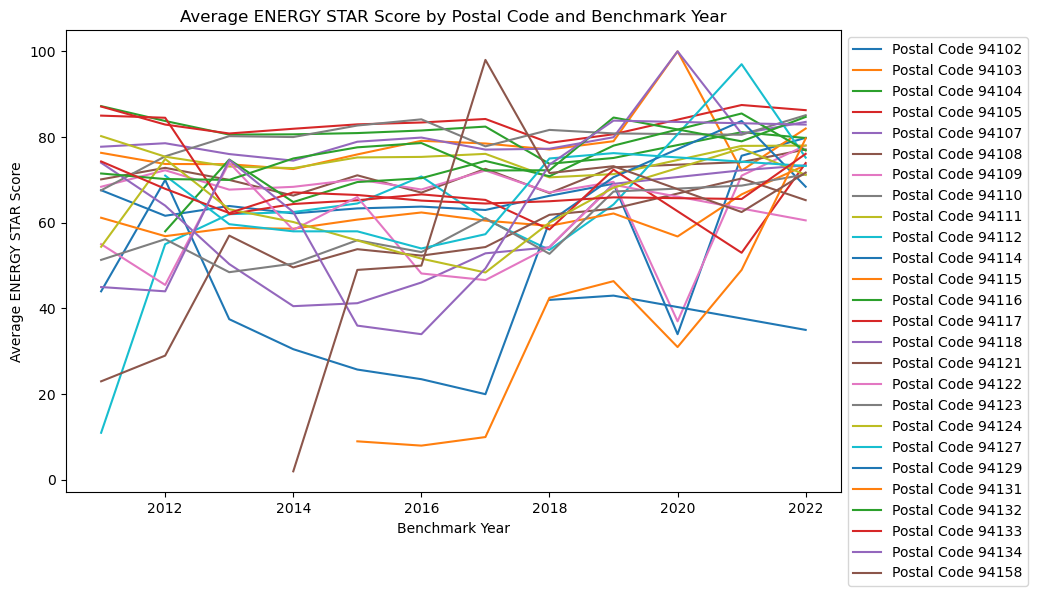

In [10]:
grouped_data = df2.groupby(['Postal Code', 'Benchmark Year'])['ENERGY STAR Score'].mean().reset_index()

plt.figure(figsize=(10, 6))

for postal_code, group in grouped_data.groupby('Postal Code'):
    plt.plot(group['Benchmark Year'], group['ENERGY STAR Score'], label=f'Postal Code {postal_code}')

plt.title('Average ENERGY STAR Score by Postal Code and Benchmark Year')
plt.xlabel('Benchmark Year')
plt.ylabel('Average ENERGY STAR Score')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


# Step: 06

I calculated the Energy Star Score for the benchmark year by postal code. However, due to the large number of postal codes, it was not feasible to use color to distinguish them.

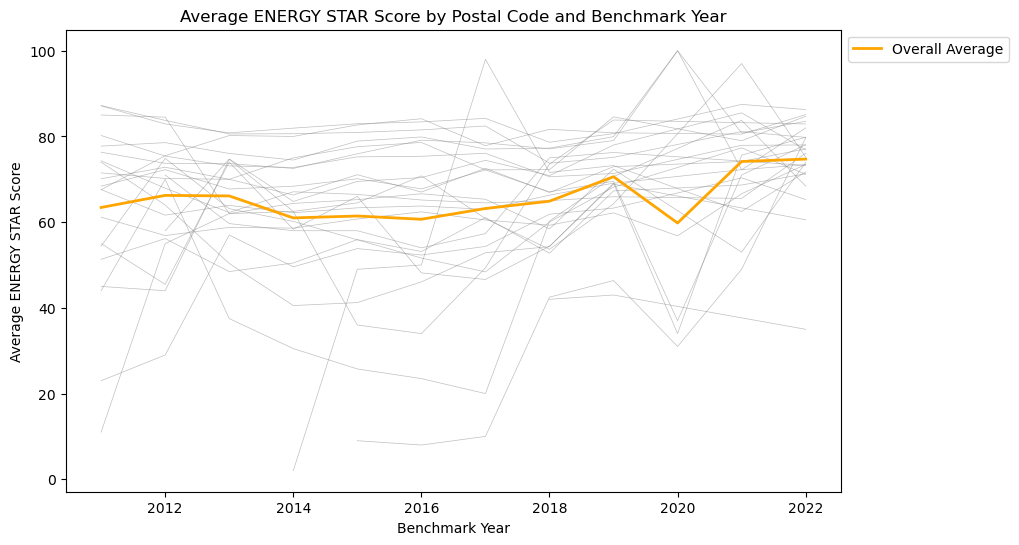

In [11]:
grouped_data = df2.groupby(['Postal Code', 'Benchmark Year'])['ENERGY STAR Score'].mean().reset_index()

plt.figure(figsize=(10, 6))


for postal_code, group in grouped_data.groupby('Postal Code'):
    plt.plot(group['Benchmark Year'], group['ENERGY STAR Score'], color='gray', linewidth=0.5,alpha=0.5)

overall_average = grouped_data.groupby('Benchmark Year')['ENERGY STAR Score'].mean()
plt.plot(overall_average.index, overall_average, color='orange', linewidth=2, label='Overall Average')

plt.title('Average ENERGY STAR Score by Postal Code and Benchmark Year')
plt.xlabel('Benchmark Year')
plt.ylabel('Average ENERGY STAR Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()

# Step: 07

My goal was to see how each postal code's Energy Star Score changed over the benchmark year, as well as how San Francisco as a whole changed over the years, so the overall average for San Francisco is represented in a line graph with a bold yellow line. I also decided that it would be difficult to differentiate between postal codes by color, so all colors were initially unified.

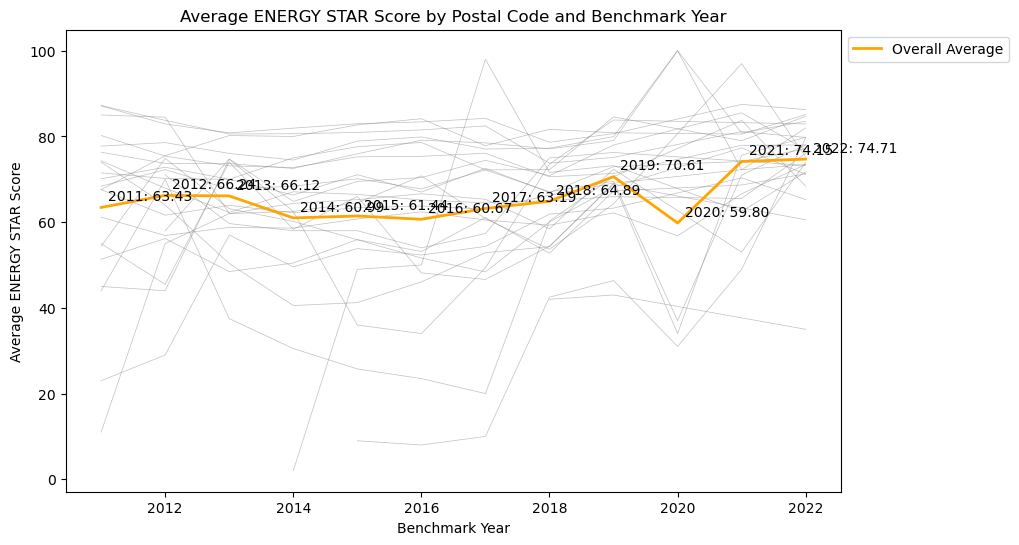

In [12]:
grouped_data = df2.groupby(['Postal Code', 'Benchmark Year'])['ENERGY STAR Score'].mean().reset_index()

plt.figure(figsize=(10, 6))

for postal_code, group in grouped_data.groupby('Postal Code'):
    plt.plot(group['Benchmark Year'], group['ENERGY STAR Score'], color='gray', linewidth=0.5, alpha=0.5)

overall_average = grouped_data.groupby('Benchmark Year')['ENERGY STAR Score'].mean()
plt.plot(overall_average.index, overall_average, color='orange', linewidth=2, label='Overall Average')

for year, score in overall_average.items():
    plt.annotate(f'{year}: {score:.2f}', xy=(year, score), xytext=(5, 5), textcoords='offset points')

plt.title('Average ENERGY STAR Score by Postal Code and Benchmark Year')
plt.xlabel('Benchmark Year')
plt.ylabel('Average ENERGY STAR Score')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Step: 08

Traditionally, I would plot the scores together so that I could see the average score for the Overall Average. But it's not visually pleasing, I wanted to do something different so that I could also see the Postal Code information behind it.

In [13]:
!pip install plotly


import plotly.express as px
import plotly.graph_objects as go

grouped_data = df2.groupby(['Postal Code', 'Benchmark Year'])['ENERGY STAR Score'].mean().reset_index()

fig = px.line(grouped_data, x='Benchmark Year', y='ENERGY STAR Score', color='Postal Code',
              title='Average ENERGY STAR Score by Postal Code and Benchmark Year',
              labels={'ENERGY STAR Score': 'Average ENERGY STAR Score', 'Benchmark Year': 'Benchmark Year'})

fig.add_trace(go.Scatter(x=overall_average.index, y=overall_average.values,
                         mode='lines', line=dict(color='orange', width=2),
                         name='Overall Average'))

fig.update_traces(mode='lines+markers')

fig.show()


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Step: 09

I used a library called 'Ploty' to make the data information for all the postal codes hoverable. However, as mentioned above, it was difficult to distinguish between the many postal codes using color, so I decided to remove it and add the Overall Average again.

In [14]:
grouped_data = df2.groupby(['Postal Code', 'Benchmark Year'])['ENERGY STAR Score'].mean().reset_index()

fig = px.line(grouped_data, x='Benchmark Year', y='ENERGY STAR Score', color='Postal Code',
              labels={'ENERGY STAR Score': 'Average Energy Star Score', 'Benchmark Year': 'Benchmark Year'})

for trace in fig.data:
    trace.line.color = 'gray'
    trace.line.width = 0.5
    trace.marker.opacity = 0.5

fig.add_trace(go.Scatter(x=overall_average.index, y=overall_average.values,
                         mode='lines', line=dict(color='orange', width=4),
                         name='Overall Average'))

fig.update_traces(mode='lines+markers')
fig.update_layout(title_text='Average Energy Star Score by Postal Code and Benchmark Year', title_x=0.5)

fig.show()


# Step: 10

This is the final General Public project visualization. When users are hovering around, they can see the Average Energy Star Score by Benchmark Year by Postal Code in the line graph, and they can also easily see the Overall Average by Benchmark Year for San Francisco by using the bold yellow line.

# Project reviews

For the General Public Project, I were trying to effectively communicate a wide range of information to the public. My biggest challenge in this project was how to make the vast amount of information easily understandable and digestible to the public. This led me to realize the importance of deciding what information to highlight and what to de-emphasize.

Data visualization is one important way to help communicate and understand this information. To this end, I leveraged the Plotly library to create a variety of charts and graphs and explore ways to visually represent the data. With the power of Plotly, I tried to make the information more intuitive and the data more accessible by implementing interactive visualizations that interact with the user.

However, a more important challenge was deciding what information to highlight and what to leave out - a key part of the public's uptake of the information. Specifically, I needed to define what message I wanted to clearly convey, and design the visualization accordingly. This approach led me to create a form of visualization that went beyond just a visual representation of the data, and focused on communicating the message.

Finally, it was important to look at the data from the user's perspective, and consider what information they were interested in. I think that this allows for better communication between creator and receiver, and results in a more effective way to help the public understand and utilize the information.